In [42]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
import openpyxl
import warnings
warnings.filterwarnings('ignore')
total=[]
df = pd.read_csv("E:\\sanjay\\HR Lab\\pca.csv")
total.append( (df['TOTAL'] >70).sum())
total.append( (df['TOTAL'] <70).sum())
total.append((df['TOTAL'] ==70).sum())


In [43]:
tw=[]
tw.append( (df['team work'] >15).sum())
tw.append( (df['team work'] <15).sum())
tw.append((df['team work'] ==15).sum())
sal=[]
sal.append( (df['salary'] >5).sum())
sal.append( (df['salary'] <5).sum())
sal.append((df['salary'] ==5).sum())

wl=[]
wl.append( (df['Work-life balance'] >15).sum())
wl.append( (df['Work-life balance'] <15).sum())
wl.append((df['Work-life balance'] ==15).sum())

l=[]
l.append( (df['Leadership principle'] >5).sum())
l.append( (df['Leadership principle'] <5).sum())
l.append((df['Leadership principle'] ==5).sum())

inno=[]
inno.append( (df['Innovation'] >12).sum())
inno.append( (df['Innovation'] <12).sum())
inno.append((df['Innovation'] ==12).sum())

client=[]
client.append( (df['Clients'] >25).sum())
client.append( (df['Clients'] <25).sum())
client.append((df['Clients'] ==25).sum())

In [44]:
data=[total,tw,sal,wl,l,inno,client]
print(data)
row_names=['Total', 'Team work', 'salary','Work-life balance','Leadership principle','Innovation','Clients']
data = pd.DataFrame(data, columns=['High','equal','low'])
data.index=row_names
data=data.transpose()
pd.set_option('display.max_columns', None)

print(data)

[[143, 44, 13], [146, 37, 17], [111, 57, 32], [81, 94, 25], [110, 54, 36], [86, 79, 35], [3, 192, 5]]
       Total  Team work  salary  Work-life balance  Leadership principle  \
High     143        146     111                 81                   110   
equal     44         37      57                 94                    54   
low       13         17      32                 25                    36   

       Innovation  Clients  
High           86        3  
equal          79      192  
low            35        5  


In [45]:
correlation_matrix = data.corr()
print(correlation_matrix)

                         Total  Team work    salary  Work-life balance  \
Total                 1.000000   0.996324  0.996437           0.544410   
Team work             0.996324   1.000000  0.985548           0.470548   
salary                0.996437   0.985548  1.000000           0.613217   
Work-life balance     0.544410   0.470548  0.613217           1.000000   
Leadership principle  0.999987   0.995877  0.996852           0.548654   
Innovation            0.771278   0.713915  0.822213           0.953799   
Clients              -0.297910  -0.378593 -0.216337           0.638546   

                      Leadership principle  Innovation   Clients  
Total                             0.999987    0.771278 -0.297910  
Team work                         0.995877    0.713915 -0.378593  
salary                            0.996852    0.822213 -0.216337  
Work-life balance                 0.548654    0.953799  0.638546  
Leadership principle              1.000000    0.774494 -0.293068  
Innov

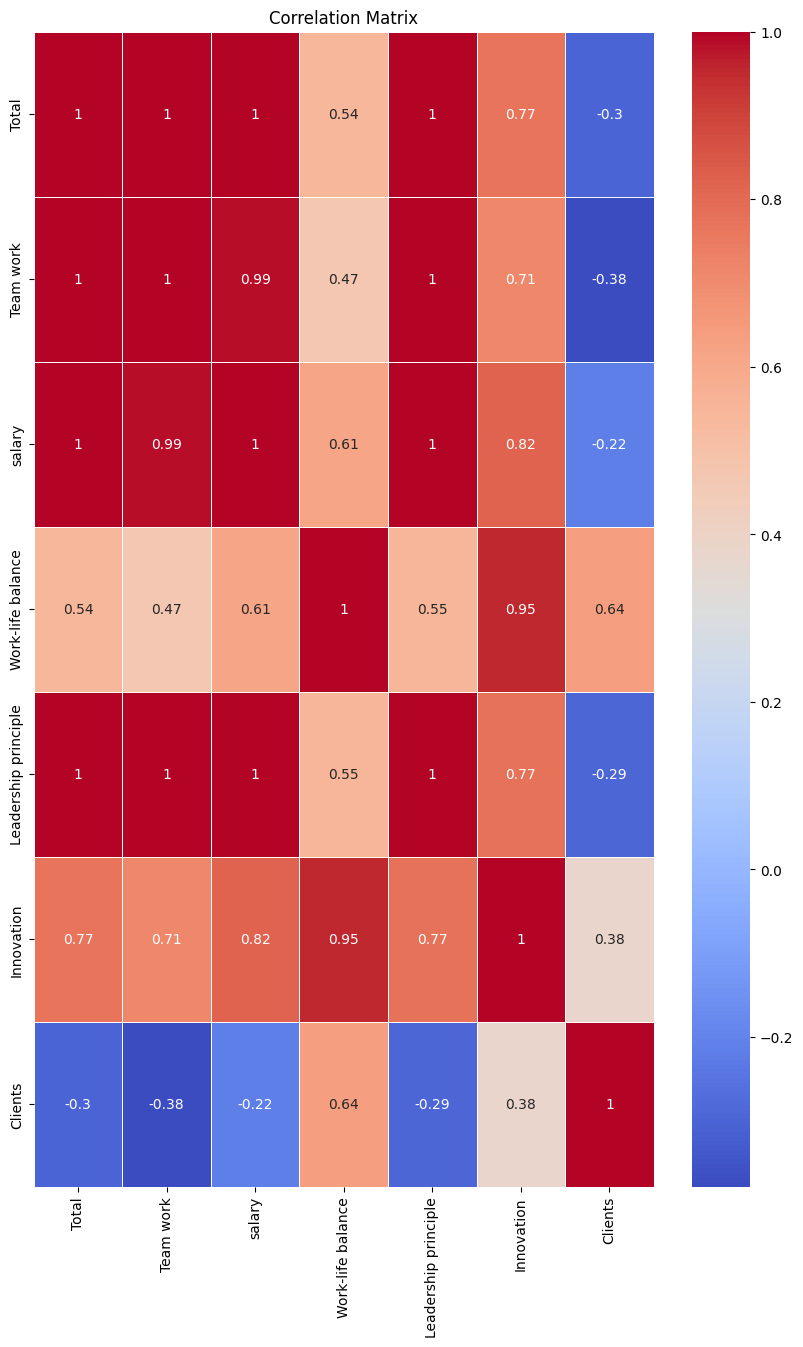

In [46]:
plt.figure(figsize=(10, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [47]:
job_satisfaction = df.groupby('Job Title')['TOTAL'].mean()
print("\nJob Satisfaction:")
print(job_satisfaction)

age_satisfaction = df.groupby('Age')['TOTAL'].mean()
print("\nAge wise Satisfaction:")
print(age_satisfaction)

sat = df['TOTAL'].mean()
print(f"\n\nOverall Satisfaction of Employees: {sat:.2f}")



Job Satisfaction:
Job Title
1.0    74.848485
2.0    75.250000
3.0    75.433333
5.0    75.548387
6.0    72.742857
7.0    73.766667
Name: TOTAL, dtype: float64

Age wise Satisfaction:
Age
0.0    76.666667
1.0    74.301205
2.0    74.708333
3.0    75.000000
Name: TOTAL, dtype: float64


Overall Satisfaction of Employees: 74.58


In [48]:
correlation_coefficient, p_value = pearsonr( df['TOTAL'], df['HCRI'] )

# Print the correlation coefficient and its significance
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

# Determine if the correlation is significant (common significance level is 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: -0.06
P-value: 0.42
The correlation is not statistically significant.


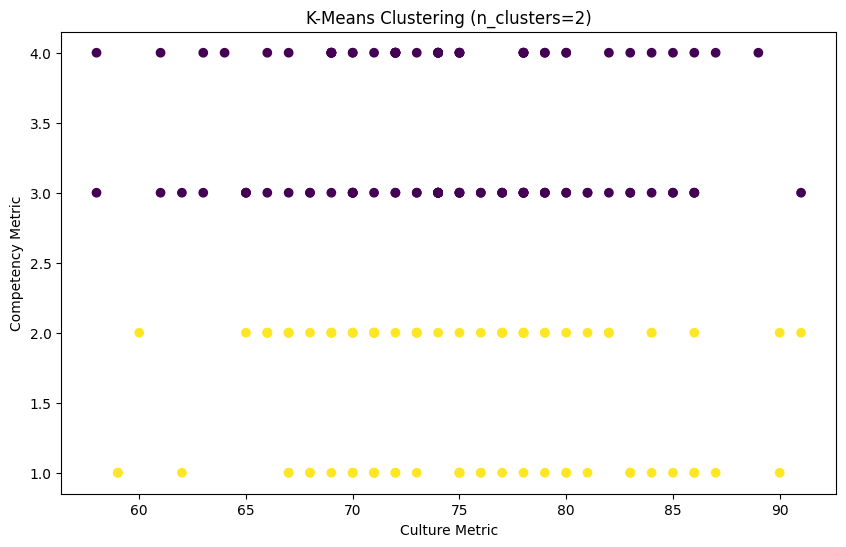

In [49]:
# Clustering

X = df[['TOTAL', 'BARS']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Specify the number of clusters 
n_clusters = 2

# Create and fit a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_std)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters (optional)
plt.figure(figsize=(10, 6))
plt.scatter(df['TOTAL'], df['BARS'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Culture Metric')
plt.ylabel('Competency Metric')
plt.title(f'K-Means Clustering (n_clusters={n_clusters})')
plt.show()

     Work-life balance  Leadership principle  Innovation  Clients  TOTAL  HCRI
0                   11                     7          12       16     72    36
1                   14                     5          13       14     66    42
2                   17                     9          13       19     73    87
3                   16                     7          10       13     72    88
4                   13                     6           8       15     75    98
..                 ...                   ...         ...      ...    ...   ...
195                 12                     5           9       19     74    45
196                 14                    10          11       19     74    75
197                 12                     9           9       17     69    80
198                 11                     8          12       10     70    38
199                 14                     2          13       26     78    81

[200 rows x 6 columns]


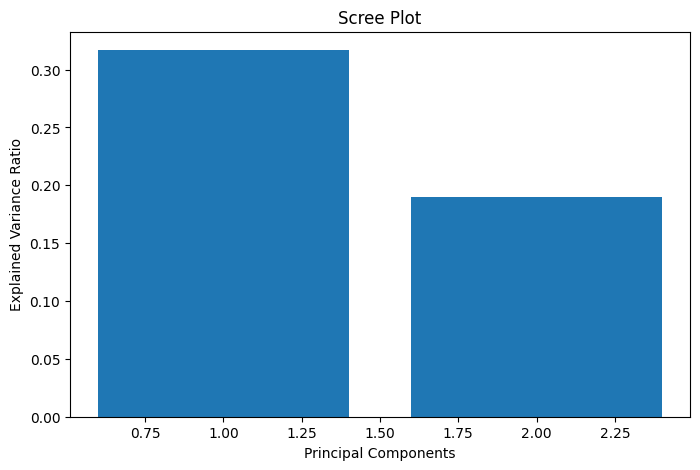

Cumulative Explained Variance:
[0.31682672 0.50642533]
Loadings of Metrics on Principal Components:
[[-0.43225042 -0.18988157 -0.25413558 -0.49236182 -0.67732998  0.10641248]
 [ 0.36554417 -0.49473266 -0.56437713  0.16468731 -0.08401486 -0.51857024]]


In [50]:
# PCA

culture_column_numbers = [4, 5, 6, 7]
competency_column_numbers = [8,9]

# Use .iloc to select culture and competency columns
culture_df = df.iloc[:, culture_column_numbers]
competency_df = df.iloc[:, competency_column_numbers]

# Concatenate the selected DataFrames horizontally (axis=1)
combined_df = pd.concat([culture_df, competency_df], axis=1)

# Now 'combined_df' contains both culture and competency columns
print(combined_df)

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)

# Perform PCA
n_components = min(len(culture_column_numbers), len(competency_column_numbers))  # Number of components to retain
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot to visualize explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Print the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:")
print(cumulative_variance)

# You can also print the loadings of each metric on the principal components if needed
loadings = pca.components_
print("Loadings of Metrics on Principal Components:")
print(loadings)

In [51]:
# Split the data into features (X) and the target variable (y)
X = df[['TOTAL', 'HCRI', 'BARS']]  
y = df['Compensation Satisfaction Score']  

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

  Feature  Importance
1    HCRI    0.480417
0   TOTAL    0.394497
2    BARS    0.125085


In [1]:
import openpyxl

# Cost-benefit Analysis

workbook = openpyxl.load_workbook("E:\\sanjay\\HR Lab\\pca.xlsx")
worksheet = workbook['pca']

Revenue_Per_Employee = worksheet.cell(row=2, column=18)
Cost_Per_Employee = worksheet.cell(row=3, column=18)
No_of_employees = worksheet.cell(row=4, column=18)

rev = float(Revenue_Per_Employee.value)
num = float(No_of_employees.value)
cost = float(Cost_Per_Employee.value)

# Calculate Total Revenue
Total_Revenue = rev * num

# Calculate Total Cost
Total_Cost = cost * num

# Calculate Net Benefit
Net_Benefit = Total_Revenue - Total_Cost

print("Net Benefit: ", Net_Benefit)

Net Benefit:  60000000.0


In [54]:
## Recruitment Analysis

hire = pd.read_excel("E:\\sanjay\\HR Lab\\pca.xlsx" , sheet_name='hire')

categorical_columns = [ 'Sourcing Channel']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    hire[column] = le.fit_transform(hire[column])
    label_encoders[column] = le
print(hire.head())

             Name                          Email  Age  Job Title  \
0     Kelly Greer     tiffany89@morse-newman.com    2          2   
1  Austin Wallace  jorgeharrison@golden-dyer.com    1          4   
2    Leslie Jones         danielpatton@smith.com    3          6   
3   David Hoffman          loganjames@mccoy.info    3          5   
4       Mary Clay          lorraine89@santos.com    2          3   

   Recruitng Cost (40000)  Induction Program Cost (30000)  Target Given  \
0                   39696                           25418             7   
1                   21014                           12921             5   
2                   24042                           11718             5   
3                   23939                           15895             3   
4                   29866                           25920             4   

   Target Achieved  Performance Differential  \
0                6                        -1   
1               10                         5

In [55]:
## Feature Importance Analysis

# Split the data into features (X) and the target variable (y)
X = hire[['Time to Fill (Days 15)', 'New Hires performance satisfaction (100)', 'Performance Differential']]  
Y = hire['Sourcing Channel']  

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
model.fit(X, Y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

                                    Feature  Importance
1  New Hires performance satisfaction (100)    0.393444
0                    Time to Fill (Days 15)    0.324364
2                  Performance Differential    0.282193


In [56]:
## Correlation Analysis

print("\nCorrelation & P_value:\n")

correlation, p_value = spearmanr(hire['Sourcing Channel'], hire['Time to Fill (Days 15)'])
print(f"Sourcing Channel & Time to Fill - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(hire['Sourcing Channel'], hire['New Hires performance satisfaction (100)'])
print(f"Sourcing Channel & Performance satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")


Correlation & P_value:

Sourcing Channel & Time to Fill - Correlation: -0.07  P_value: 0.61
Sourcing Channel & Performance satisfaction - Correlation: -0.25  P_value: 0.08


In [57]:
## Training and development Analysis

## Correlation Analysis

print("\nCorrelation & P_value:\n")

correlation, p_value = spearmanr(hire['Employee Training Satisfaction'], hire['Hours Satisfaction'])
print(f"Employee Training Satisfaction & Hours Satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(hire['Employee Training Satisfaction'], hire['Content Satisfaction'])
print(f"Employee Training Satisfaction & Content Satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(hire['Employee Training Satisfaction'], hire['Skill Development'])
print(f"Employee Training Satisfaction & Skill Development - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(hire['Employee Training Satisfaction'], hire['Knowledge Level'])
print(f"Employee Training Satisfaction & Knowledge Level - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")


Correlation & P_value:

Employee Training Satisfaction & Hours Satisfaction - Correlation: 0.11  P_value: 0.44
Employee Training Satisfaction & Content Satisfaction - Correlation: -0.08  P_value: 0.57
Employee Training Satisfaction & Skill Development - Correlation: -0.16  P_value: 0.27
Employee Training Satisfaction & Knowledge Level - Correlation: 0.34  P_value: 0.02


In [58]:
## Correlation for recruitment and training

hired = hire[['Content Satisfaction', 'Skill Development', 'Knowledge Level', 'Hours Satisfaction', 'Sourcing Channel', 'New Hires performance satisfaction (100)','Employee Training Satisfaction']]

correlation_matrix = hired.corr()

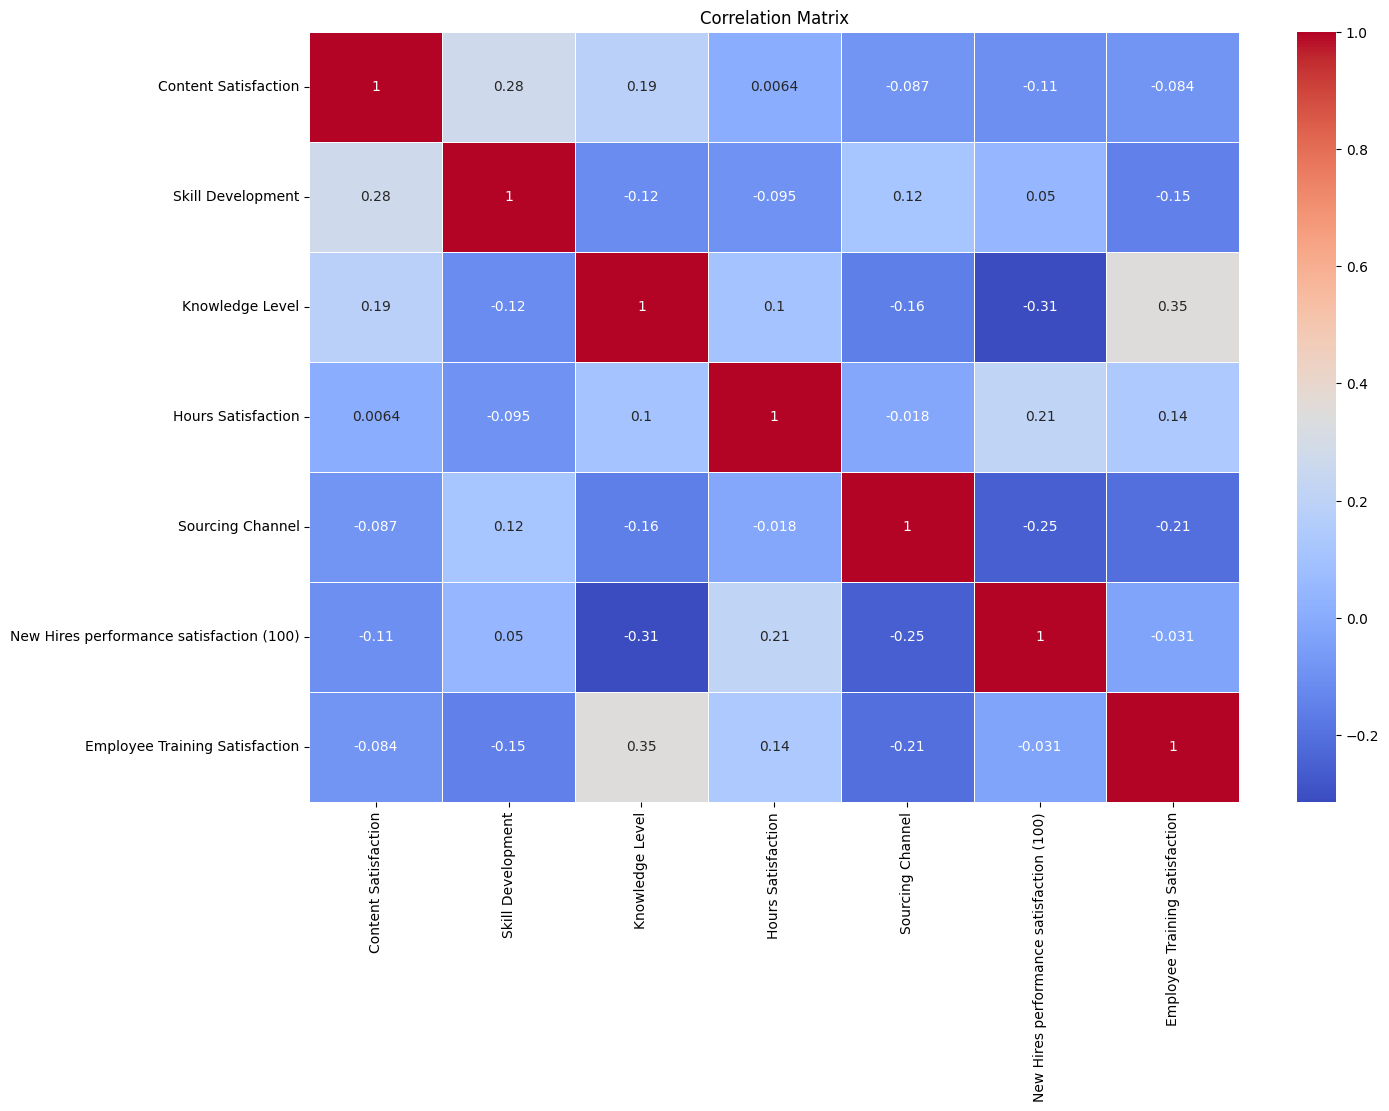

In [59]:
#Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
## Performance Management

per = pd.read_excel("E:\\sanjay\\HR Lab\\pca.xlsx" , sheet_name='data')

## Correlation Analysis

print("\nCorrelation & P_value:\n")

correlation, p_value = spearmanr(hire['Performance Rating'], hire['Sourcing Channel'])
print(f"Performance Rating & Sourcing Channel - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(hire['Performance Rating'], hire['Hours Satisfaction'])
print(f"Performance Rating & Hours Satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")

correlation, p_value = spearmanr(hire['Performance Rating'], hire['Employee Training Satisfaction'])
print(f"Performance Rating & Employee Training Satisfaction - Correlation: {correlation:.2f}  P_value: {p_value:.2f}")


Correlation & P_value:

Performance Rating & Sourcing Channel - Correlation: 0.03  P_value: 0.86
Performance Rating & Hours Satisfaction - Correlation: 0.04  P_value: 0.79
Performance Rating & Employee Training Satisfaction - Correlation: -0.07  P_value: 0.62


In [62]:
# Calculate the correlations
correlation_hp_rr = per['High Performer'].corr(per['Retention Rate'])
correlation_lp_rr = per['Low Performer'].corr(per['Retention Rate'])
correlation_hp_tr = per['High Performer'].corr(per['Turnover_ratio'])
correlation_lp_tr = per['Low Performer'].corr(per['Turnover_ratio'])
correlation_satisfaction_rr = per['Overall Employee Satisfaction'].corr(per['Retention Rate'])

In [63]:
# Print the correlation coefficients
print(f'Correlation between High Performer and Retention Rate: {correlation_hp_rr:.2f}')
print(f'Correlation between Low Performer and Retention Rate: {correlation_lp_rr:.2f}')
print(f'Correlation between High Performer and Turnover Ratio: {correlation_hp_tr:.2f}')
print(f'Correlation between Low Performer and Turnover Ratio: {correlation_lp_tr:.2f}')
print(f'Correlation between Employee Satisfaction and Retention Rate: {correlation_satisfaction_rr:.2f}')

Correlation between High Performer and Retention Rate: 0.02
Correlation between Low Performer and Retention Rate: -0.03
Correlation between High Performer and Turnover Ratio: 0.25
Correlation between Low Performer and Turnover Ratio: -0.16
Correlation between Employee Satisfaction and Retention Rate: -0.03
